In [1]:
#libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist, cifar10, fashion_mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

2.Define the Neural Network Architecture

In [3]:
def build_model(input_shape, num_classes):
    model = Sequential([
        Flatten(input_shape=input_shape),        # Flatten the input
        Dense(128, activation='relu'),           # First hidden layer
        Dropout(0.5),                            # Dropout for regularization
        Dense(64, activation='relu'),            # Second hidden layer
        Dense(num_classes, activation='softmax') # Output layer
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


3. Dataset Preparation and Model Training

In [9]:
# Load and prepare the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build and train the model
model = build_model((28, 28), 10)
history = model.fit(x_train, y_train, epochs=15, batch_size=30, validation_split=0.2)
model.evaluate(x_test, y_test)


Epoch 1/15
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7886 - loss: 0.6865 - val_accuracy: 0.9481 - val_loss: 0.1762
Epoch 2/15
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9203 - loss: 0.2548 - val_accuracy: 0.9614 - val_loss: 0.1316
Epoch 3/15
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9372 - loss: 0.2053 - val_accuracy: 0.9637 - val_loss: 0.1189
Epoch 4/15
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9429 - loss: 0.1813 - val_accuracy: 0.9663 - val_loss: 0.1111
Epoch 5/15
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9475 - loss: 0.1679 - val_accuracy: 0.9686 - val_loss: 0.1056
Epoch 6/15
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9532 - loss: 0.1547 - val_accuracy: 0.9694 - val_loss: 0.0991
Epoch 7/15
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9532 - loss: 0.1516 - val_accuracy: 0.9733 - val_loss: 0.0915
Epoch 8/15
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9558 - loss: 0.1398

[0.08677925914525986, 0.9750999808311462]

b. CIFAR-10: Object Recognition (10 classes)

In [10]:
# Load and prepare the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build and train the model
model = build_model((32, 32, 3), 10)
history = model.fit(x_train, y_train, epochs=15, batch_size=30, validation_split=0.2)
model.evaluate(x_test, y_test)


Epoch 1/15
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.1577 - loss: 2.2144 - val_accuracy: 0.2397 - val_loss: 2.0330
Epoch 2/15
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.1850 - loss: 2.1143 - val_accuracy: 0.2565 - val_loss: 2.0504
Epoch 3/15
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.1915 - loss: 2.0899 - val_accuracy: 0.2599 - val_loss: 2.0313
Epoch 4/15
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.2101 - loss: 2.0684 - val_accuracy: 0.2648 - val_loss: 2.0030
Epoch 5/15
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.2077 - loss: 2.0679 - val_accuracy: 0.2394 - val_loss: 2.0547
Epoch 6/15
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.2150 - loss: 2.0554 - val_accuracy: 0.2547 - val_loss: 2.0601
Epoch 7/15
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.2114 - loss: 2.0671 - val_accuracy: 0.2374 - val_loss: 2.0289
Epoch 8/15
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.2172 - loss: 2

[2.031909465789795, 0.24420000612735748]

c. Iris: Flower Classification (3 classes)


In [11]:
# Load and prepare the Iris dataset
iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

# Build and train the model
model = build_model((4,), 3)  # Input shape is 4 for the Iris dataset
history = model.fit(x_train, y_train, epochs=80, batch_size=16, validation_split=0.2)
model.evaluate(x_test, y_test)


Epoch 1/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.4260 - loss: 1.2607 - val_accuracy: 0.5000 - val_loss: 0.9945
Epoch 2/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3823 - loss: 1.1896 - val_accuracy: 0.5000 - val_loss: 0.8705
Epoch 3/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6821 - loss: 0.8893 - val_accuracy: 0.7083 - val_loss: 0.7766
Epoch 4/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5488 - loss: 0.8747 - val_accuracy: 0.7083 - val_loss: 0.6934
Epoch 5/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6439 - loss: 0.7853 - val_accuracy: 0.7083 - val_loss: 0.6307
Epoch 6/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.4832 - loss: 0.8249 - val_accuracy: 1.0000 - val_loss: 0.5953
Epoch 7/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7103 - loss: 0.6748 - val_accuracy: 1.0000 - val_loss: 0.5553
Epoch 8/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6641 - loss: 0.7098 - val_accuracy: 1.0000 - val_loss: 0.5347

[0.0701713040471077, 1.0]

d. Fashion-MNIST: Clothing Item Classification (10 classes)


In [12]:
# Load and prepare the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build and train the model
model = build_model((28, 28), 10)
history = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_split=0.2)
model.evaluate(x_test, y_test)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6881 - loss: 0.8837 - val_accuracy: 0.8376 - val_loss: 0.4403
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8168 - loss: 0.5048 - val_accuracy: 0.8528 - val_loss: 0.3933
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8320 - loss: 0.4615 - val_accuracy: 0.8567 - val_loss: 0.4080
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8389 - loss: 0.4411 - val_accuracy: 0.8610 - val_loss: 0.3701
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8432 - loss: 0.4241 - val_accuracy: 0.8655 - val_loss: 0.3665
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8476 - loss: 0.4106 - val_accuracy: 0.8672 - val_loss: 0.3646
Epoch 7/15
1500/1500 ━━━━━━━━━━━

[0.35748499631881714, 0.8686000108718872]

e. Reuters Newswire: Text Categorization (46 classes)

In [13]:
from tensorflow.keras.datasets import reuters

# Load and prepare the Reuters dataset
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)
tokenizer = Tokenizer(num_words=10000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
y_train = to_categorical(y_train, 46)
y_test = to_categorical(y_test, 46)

# Build and train the model
model = build_model((10000,), 46)
history = model.fit(x_train, y_train, epochs=15, batch_size=30, validation_split=0.2)
model.evaluate(x_test, y_test)


2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.5337 - loss: 2.1469 - val_accuracy: 0.7540 - val_loss: 1.0831
Epoch 2/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.7916 - loss: 0.9039 - val_accuracy: 0.7974 - val_loss: 0.9128
Epoch 3/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.8651 - loss: 0.5844 - val_accuracy: 0.8114 - val_loss: 0.8597
Epoch 4/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9101 - loss: 0.3666 - val_accuracy: 0.8141 - val_loss: 0.8656
Epoch 5/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9348 - loss: 0.2759 - val_accuracy: 0.8108 - val_loss: 0.9190
Epoch 6/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9472 - loss: 0.2157 - val_accuracy: 0.8114 - val_loss: 0.9832
Epoch 7/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9510 - loss: 0.2034 - val_accuracy: 0.8058 - val_loss: 1.0203
Epoch 8/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms

[1.233070731163025, 0.8027604818344116]

4. Evaluation

In [14]:
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    print("Test Accuracy:", model.evaluate(x_test, y_test)[1])
    print("Classification Report:\n", classification_report(y_true, y_pred_classes))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_classes))

# Example: Evaluate the MNIST model
evaluate_model(model, x_test, y_test)


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8112 - loss: 1.2253
Test Accuracy: 0.8027604818344116
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.77      0.78      0.77       105
           2       0.60      0.60      0.60        20
           3       0.92      0.93      0.92       813
           4       0.79      0.89      0.84       474
           5       1.00      0.20      0.33         5
           6       0.90      0.64      0.75        14
           7       0.50      0.33      0.40         3
           8       0.71      0.71      0.71        38
           9       0.86      0.76      0.81        25
          10       0.93      0.90      0.92        30
          11       0.65      0.77      0.70        83
          12       0.50      0.23      0.32        13
          13       0.54      0.73      0.62        37
          14       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


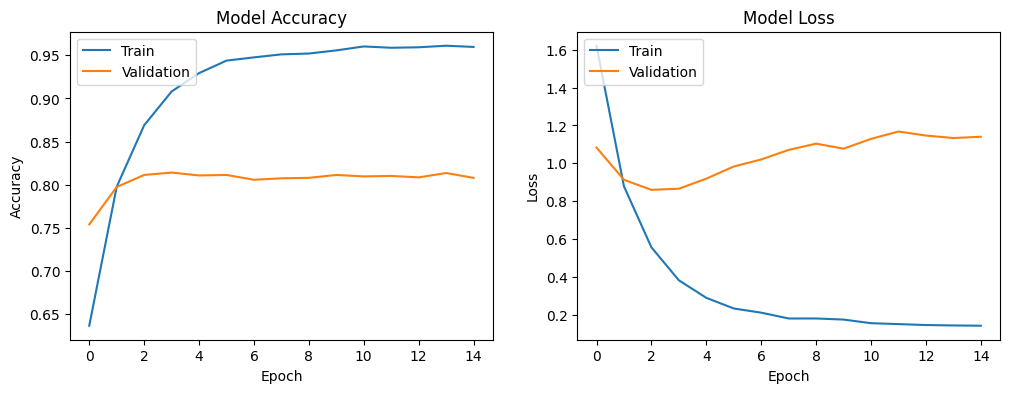

In [15]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

# Example: Plot training history for MNIST model
plot_training_history(history)
